# Partie visualisation

## Création du dataframe

In [11]:
!pip3 install wordcloud pandas

Traceback (most recent call last):
  File "/usr/bin/pip3", line 6, in <module>
    from pkg_resources import load_entry_point
  File "/home/user/.local/lib/python3.8/site-packages/pkg_resources/__init__.py", line 3249, in <module>
    def _initialize_master_working_set():
  File "/home/user/.local/lib/python3.8/site-packages/pkg_resources/__init__.py", line 3223, in _call_aside
    f(*args, **kwargs)
  File "/home/user/.local/lib/python3.8/site-packages/pkg_resources/__init__.py", line 3261, in _initialize_master_working_set
    working_set = WorkingSet._build_master()
  File "/home/user/.local/lib/python3.8/site-packages/pkg_resources/__init__.py", line 619, in _build_master
    return cls._build_from_requirements(__requires__)
  File "/home/user/.local/lib/python3.8/site-packages/pkg_resources/__init__.py", line 632, in _build_from_requirements
    dists = ws.resolve(reqs, Environment())
  File "/home/user/.local/lib/python3.8/site-packages/pkg_resources/__init__.py", line 1044, in _

In [2]:
import os
import json
import pandas as pd
data = []

for filename in os.listdir("metadata"):
    if filename.endswith(".json"):
        with open(os.path.join("metadata", filename), "r") as f:
            metadata = json.load(f)

        name = metadata.get("name")
        scientific_name = metadata.get("scientific_name")
        family = metadata.get("family")
        location = metadata.get("location")
        width = metadata.get("width")
        height = metadata.get("height")
        format = metadata.get("format")
        mode = metadata.get("mode")
        dominated_colors = metadata.get("dominated_colors")
        dominated_colors_name = metadata.get("dominated_colors_name")
        exif = metadata.get("exif", {})
        make = exif.get("Make")
        model = exif.get("Model")
        orientation = exif.get("Orientation")
        if "exif" in metadata and "DateTime" in metadata["exif"]:
            date_time = metadata['exif']['DateTime'][:4]
        else:
            date_time = None

        data.append({
            "name": name,
            "scientific_name": scientific_name,
            "family": family,
            "location": location,
            "filename": filename,
            "width": width,
            "height": height,
            "format": format,
            "mode": mode,
            "dominated_colors": dominated_colors,
            "dominated_colors_name": dominated_colors_name,
            "make": make,
            "model": model,
            "orientation": orientation,
            "year": date_time
        })

df = pd.DataFrame(data)

df

,name,scientific_name,family,location,filename,width,height,format,mode,dominated_colors,dominated_colors_name,make,model,orientation,year
0,Hypseocharis,Hypseocharis,Geraniaceae,South America,Hypseocharis%20pimpinellifolia.json,640.0,427.0,JPEG,RGB,"[#9b7140, #161608]","[sienna, black]",None,None,NaN,None
1,Soldanella,Soldanella,Primulaceae,Europe,Soldanella%20alpina.json,1600.0,1200.0,JPEG,RGB,"[#525d30, #a79684]","[darkolivegreen, rosybrown]",None,None,NaN,None
2,Edraianthus,Edraianthus,Campanuloideae,Europe,Edraianthus%20serpyllifolius.json,600.0,450.0,JPEG,RGB,"[#b9aa9a, #453736]","[darkgrey, darkslategrey]",None,None,NaN,None
3,Japanese Bush Warbler,Horornis diphone,Horornis,Japan,Cettia%20diphone%20%28crying%29.json,1600.0,1024.0,JPEG,RGB,"[#cacece, #5d5447]","[lightgrey, darkolivegreen]",Canon,Canon EOS Kiss X5,1.0,2014
4,Chiliotrichum,Chiliotrichum,Asteraceae,South America,Chiliotrichum%20diffusum.json,850.0,1250.0,JPEG,RGB,"[#3d391f, #a59a62]","[darkslategrey, darkkhaki]",None,None,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,Japanese Tit,Parus minor,Parus,Japan,Parus%20minor%20female.json,1600.0,1280.0,JPEG,RGB,"[#bfae90, #312e22]","[tan, darkslategrey]",Canon,Canon EOS Kiss Digital X,1.0,2011
544,Arjona patagonica,Arjona patagonica,Arjona,South America,Arjona%20patagonica-flowers%2001.json,3648.0,2736.0,JPEG,RGB,"[#605f4f, #c0beb3]","[dimgrey, silver]",NIKON,COOLPIX P5000,1.0,2010
545,Araujia megapotamica,Araujia megapotamica,Araujia,South America,Araujia%20megapotamica.json,1024.0,640.0,JPEG,RGB,"[#98b58e, #435b35]","[darkseagreen, darkolivegreen]",None,None,NaN,2022
546,Sand lizard,Lacerta agilis,Lacerta,Hungary,Jaszczurka.json,3070.0,2046.0,JPEG,RGB,"[#b1ac86, #4b4a34]","[darkkhaki, darkolivegreen]",OLYMPUS IMAGING CORP.,SP510UZ,1.0,2018


## Nombre de photos par année

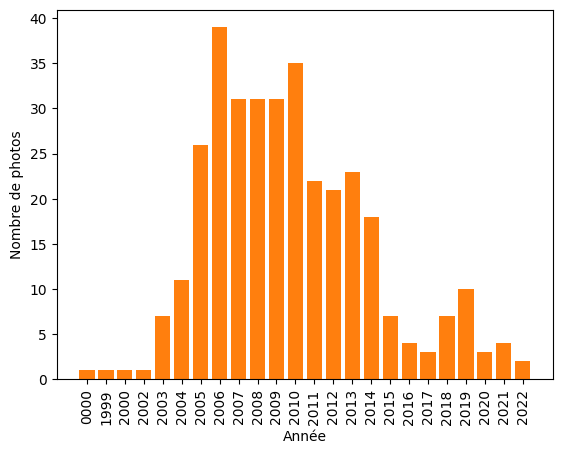

In [6]:
from pandas.io.json import _normalize
import pandas as pd
import json
import math
import matplotlib.pyplot as plot

year_counts = df.groupby('year').size()

plot.bar(year_counts.index, year_counts.values)
plot.xlabel('Année')
plot.ylabel('Nombre de photos')
plot.xticks(rotation=90)
#plot.show()

from pandas.io.json import _normalize
import pandas as pd
import json
import math
import matplotlib.pyplot as plot

year_counts = df.groupby('year').size()

plot.bar(year_counts.index, year_counts.values)
plot.xlabel('Année')
plot.ylabel('Nombre de photos')
plot.xticks(rotation=90)
#plot.show()

plot.savefig('./visualisation_images/years.png')


## Nombre de photos par année et par marque d'appareil

/home/user/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 0 ( ) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


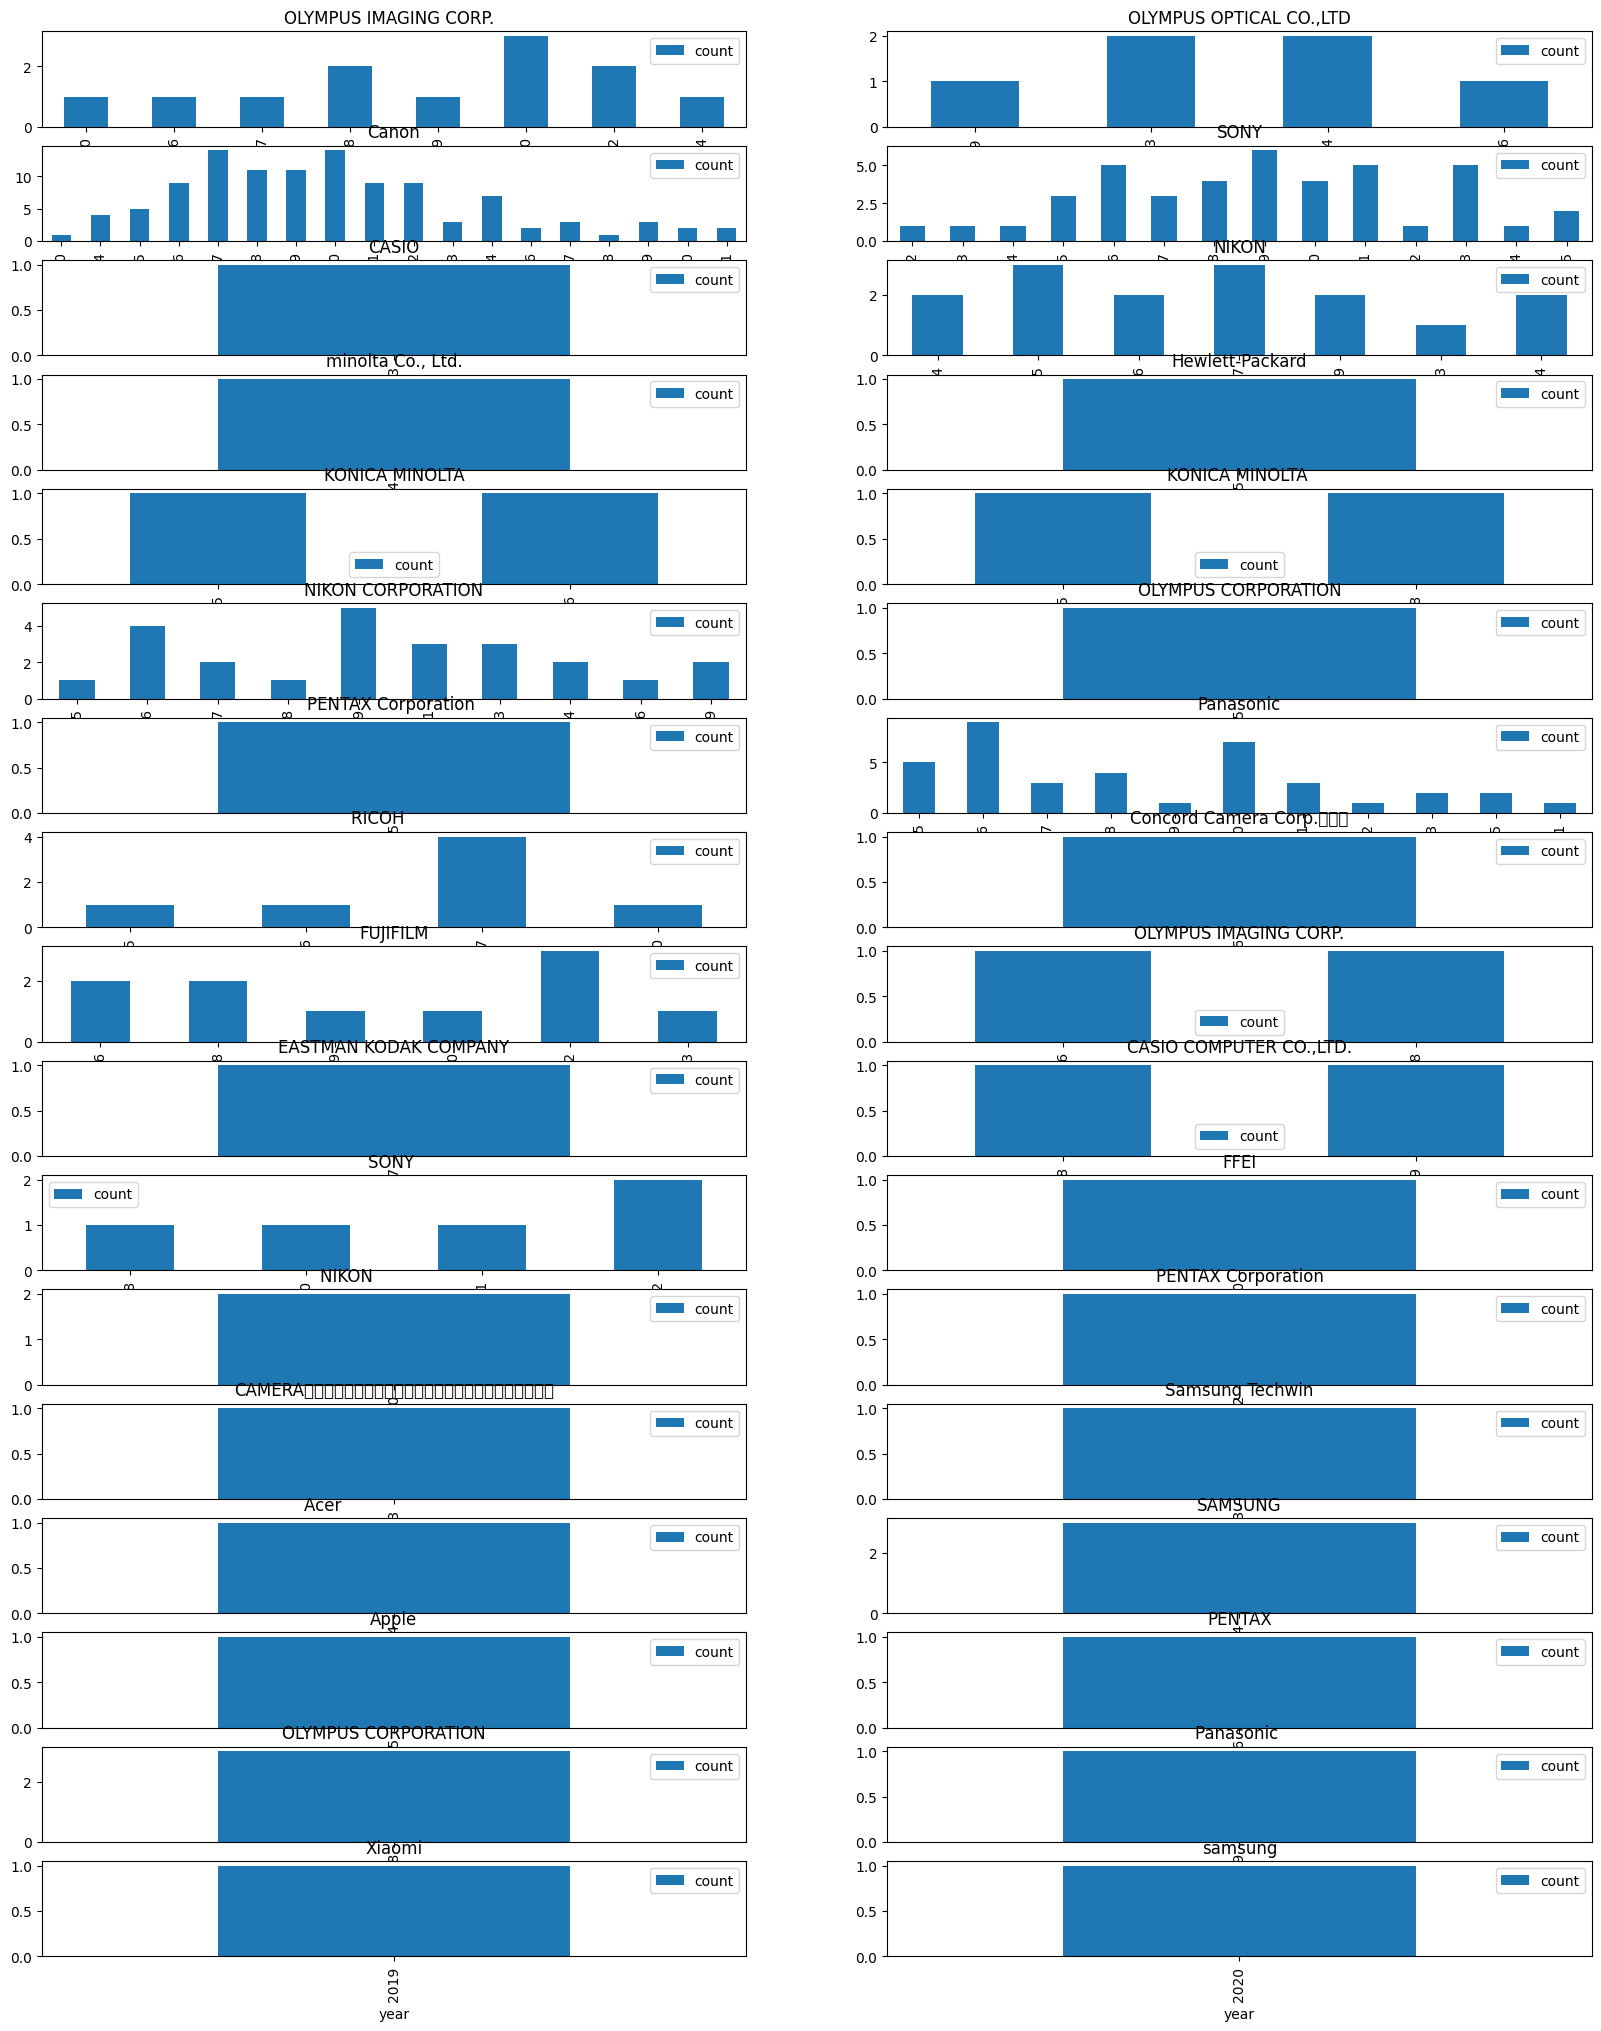

<Figure size 640x480 with 0 Axes>

In [7]:
grouped = df.groupby(['year', 'make']).size()

grouped = grouped.reset_index(name='count')

nr = math.ceil(grouped['make'].nunique() / 2)
fig, axes = plot.subplots(nrows=nr, ncols=2, figsize=(20, 25))

for i, make in enumerate(grouped['make'].unique()):
    g = grouped[grouped['make'] == make]
    g.plot(
        x="year", y="count", kind="bar", title=make, ax=axes[math.floor(i / 2), i % 2]
    )

#plot.show()

plot.savefig('./visualisation_images/devices.png')



# Nombre d'images par famille (les 20 plus grandes familles)

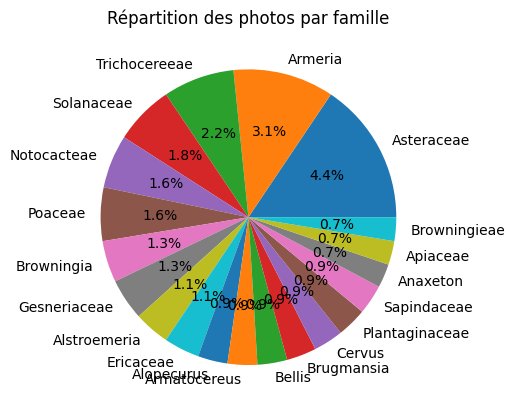

<Figure size 640x480 with 0 Axes>

In [8]:
top_families = df.groupby('family').size().nlargest(20)
total_photos = len(df)
plot.pie(top_families.values, labels=top_families.index, autopct=lambda p: '{:.1f}%'.format(p * (sum(top_families.values)/total_photos)))
plot.title('Répartition des photos par famille')
plot.show()

plot.savefig('./visualisation_images/families.png')



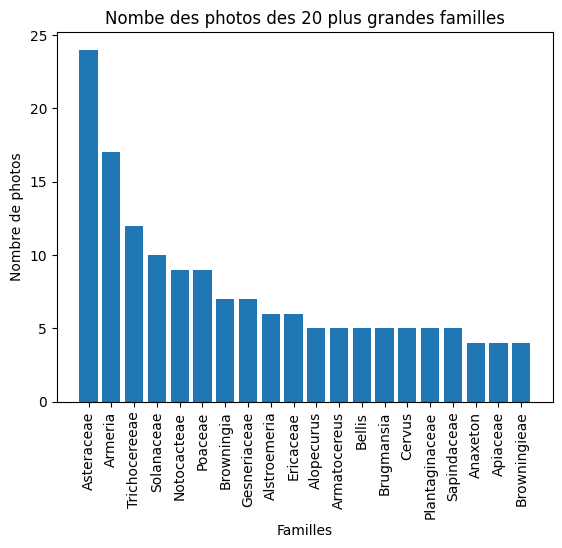

<Figure size 640x480 with 0 Axes>

In [9]:
plot.title("Nombe des photos des 20 plus grandes familles")
plot.bar(top_families.index, top_families.values)
plot.xlabel('Familles')
plot.xticks(rotation=90)
plot.ylabel('Nombre de photos')
#plot.show()

plot.savefig('./visualisation_images/top_families.png')


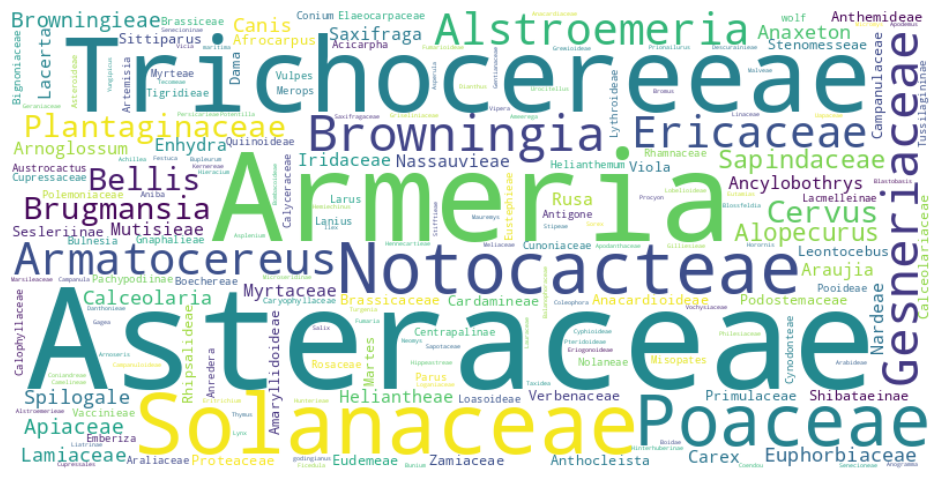

<Figure size 640x480 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

captions = ' '.join(df['family'].astype(str))

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(captions)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.show()

plt.savefig('./visualisation_images/worldcloud_families.png')


## Les 10 couleurs les plus présentes 

In [8]:
colors = [color for list_color in df['dominated_colors_name'] if list_color is not None for color in list_color]

color_counts = pd.DataFrame(colors, columns=['color'])

color_counts


,color
0,sienna
1,black
2,darkolivegreen
3,rosybrown
4,darkgrey
...,...
1059,darkolivegreen
1060,darkkhaki
1061,darkolivegreen
1062,grey


color
darkolivegreen    217
darkslategrey     170
darkgrey           75
darkkhaki          64
dimgrey            64
grey               64
silver             58
rosybrown          47
darkseagreen       45
black              40
dtype: int64
1064


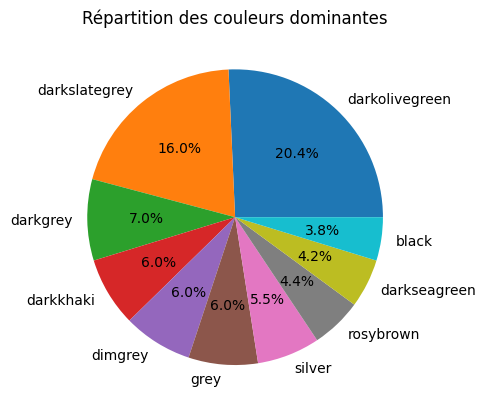

In [9]:
import matplotlib.pyplot as plot


colors_size = color_counts.groupby("color").size().nlargest(10)
total_colors = len(color_counts)
print(colors_size)
print(total_colors)
plot.pie(colors_size.values, labels=colors_size.index, autopct=lambda p: '{:.1f}%'.format(p * (sum(colors_size.values)/total_colors)))
plot.title('Répartition des couleurs dominantes')
#plot.show()

plot.savefig('./visualisation_images/colors.png')


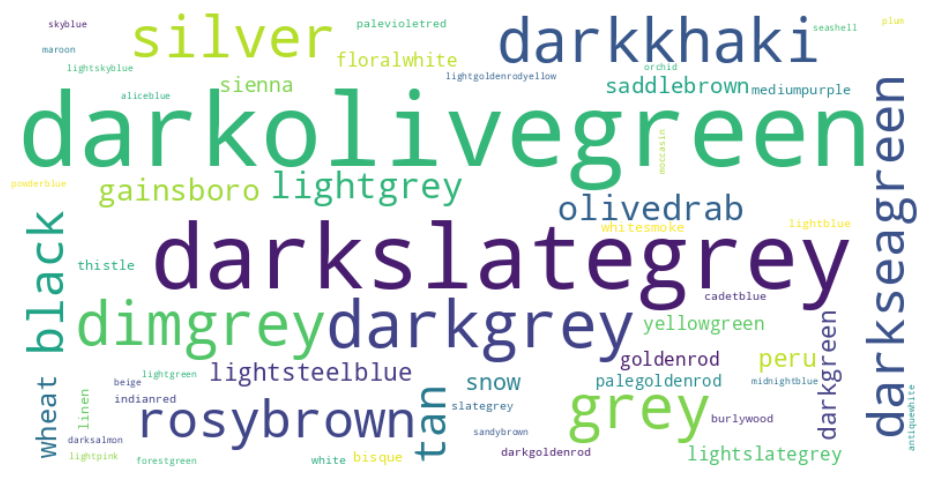

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

captions = ' '.join(color_counts['color'].astype(str))

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(captions)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

plot.savefig('./visualisation_images/wordcloud_colors.png')


## Le nombre d'images par région géographique

In [13]:
import functools
region_size = df.groupby("location").size()
total_region = functools.reduce(lambda a, b: a+b , region_size)
print(total_region)
print(region_size)

plot.savefig('./visualisation_images/visualisation.png')


548
location
Africa                       47
Asia                          6
Canada                        2
Europe                       44
Greece                        4
Hungary                       6
Japan                        36
Luxembourg                    2
Norway                        3
Republic of Ireland           2
South America               289
Spain                         6
Switzerland                  53
Turkey                        1
United States of America     47
dtype: int64


<Figure size 640x480 with 0 Axes>

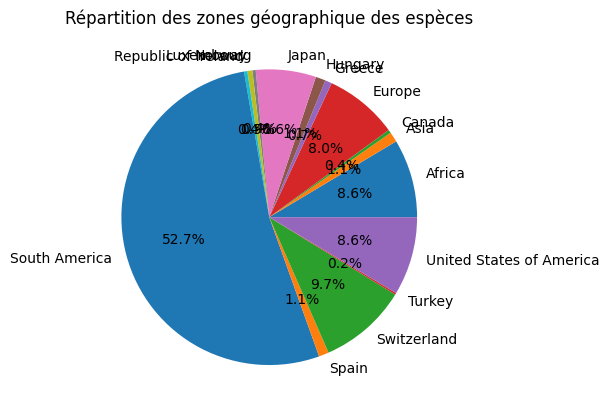

<Figure size 640x480 with 0 Axes>

In [14]:
plot.pie(region_size.values, labels=region_size.index, autopct=lambda p: '{:.1f}%'.format(p * (sum(region_size.values)/total_region)))
plot.title('Répartition des zones géographique des espèces')
plot.show()
plot.savefig('./visualisation_images/region.png')


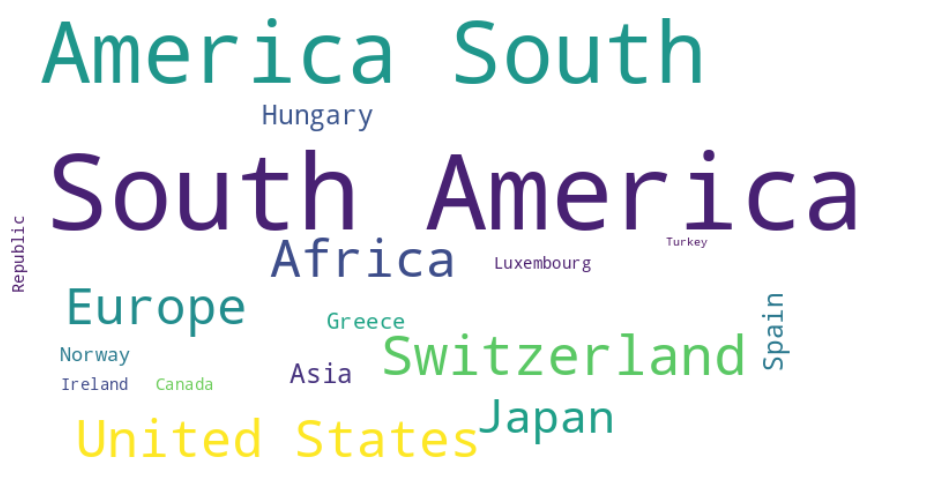

<Figure size 640x480 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

captions = ' '.join(df['location'].astype(str))

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(captions)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

plot.savefig('./visualisation_images/wordcloud_regions.png')
